In [1]:
#import everything we need

from qiskit import *
from qiskit.visualization import plot_histogram
from numpy import pi
import pandas as pd
import matplotlib as mp

import matplotlib.pyplot as plt

from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError
from qiskit.providers.aer.noise import pauli_error

In [2]:
#function to create basic circuit

def QCircuitMeasure(qc):
    qc.h(0)
    qc.cnot(0,1)
    qc.cnot(0,2)
    
    qc.measure([0,1,2], [0,1,2])
    
    return qc

In [3]:
#create a circuit for each different input state

tests = {'000': None, '010': 1, '001': 2, '011':[1,2]}
circuitsDC = {}
countsDC = {}

for i in tests:
    qc = QuantumCircuit(3,3)
    qc.i([1,2])
    qc.reset([0, 1, 2])
    if i != '000':
        qc.x(tests[i])
    circuitsDC[i] = QCircuitMeasure(qc)

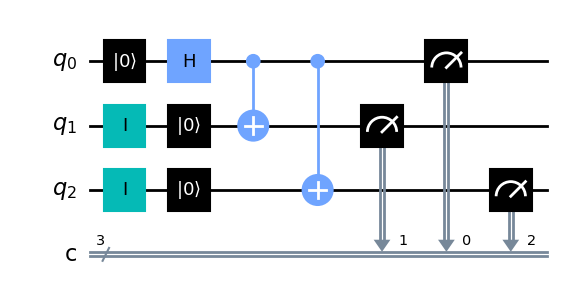

In [4]:
circuitsDC['000'].draw(output='mpl')

In [5]:
#create noise model to add error when resetting qubit

# Example error probabilities
p_reset = 0.01

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")

print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['reset']
  All-qubits errors: ['reset']


In [6]:
#simulate each circuit/input state

from qiskit.providers.aer import AerSimulator

doubleControlledResults = pd.DataFrame(columns=['000', '001', '010', '011', '100', '101', '110', '111'])

backend = AerSimulator(noise_model=noise_bit_flip)

for i in tests: # the device to run on

    result = backend.run(transpile(circuitsDC[i], backend), shots=1000000).result()
    countsDC[i]  = result.get_counts(circuitsDC[i])
    
    doubleControlledResults = pd.concat([doubleControlledResults, pd.DataFrame(countsDC[i], index=[i,])])


doubleControlledResults.fillna(0, inplace=True)

doubleControlledResults

,000,001,010,011,100,101,110,111
000,490956,43,4873,5004,4925,4942,65,489192
010,4979,4952,490255,58,45,489885,4907,4919
001,4947,5013,51,489872,490236,46,4935,4900
011,58,489921,4914,5029,5011,5033,489995,39


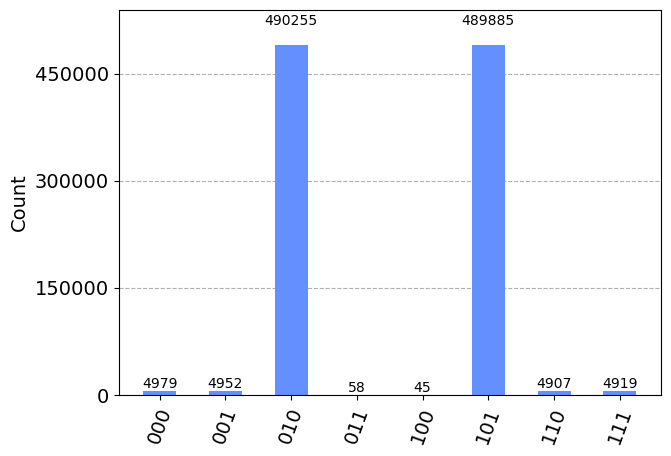

In [7]:
#plot results


plot_histogram(countsDC['010'])

In [8]:
#rename the columns because of qiskits silly convention

doubleControlledResults  = doubleControlledResults.rename(columns={'001': '100', '011': '110', '100':'001', '110':'011'})
doubleControlledResults  = doubleControlledResults [['000', '001', '010', '011', '100', '101', '110', '111']]
doubleControlledResults 

,000,001,010,011,100,101,110,111
000,490956,4925,4873,65,43,4942,5004,489192
010,4979,45,490255,4907,4952,489885,58,4919
001,4947,490236,51,4935,5013,46,489872,4900
011,58,5011,4914,489995,489921,5033,5029,39


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '000'),
  Text(1, 0, '001'),
  Text(2, 0, '010'),
  Text(3, 0, '011'),
  Text(4, 0, '100'),
  Text(5, 0, '101'),
  Text(6, 0, '110'),
  Text(7, 0, '111')])

<Figure size 640x480 with 0 Axes>

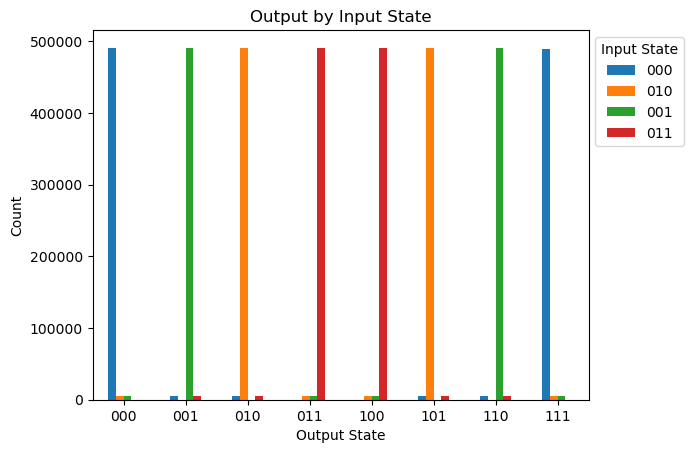

In [54]:
plt.figure()
ax = doubleControlledResults.transpose().plot(kind='bar')
ax.legend(bbox_to_anchor=(1.0, 1), title="Input State")
ax.set_title('Output by Input State')
ax.set_xlabel('Output State')
ax.set_ylabel('Count')
plt.xticks(rotation=0)

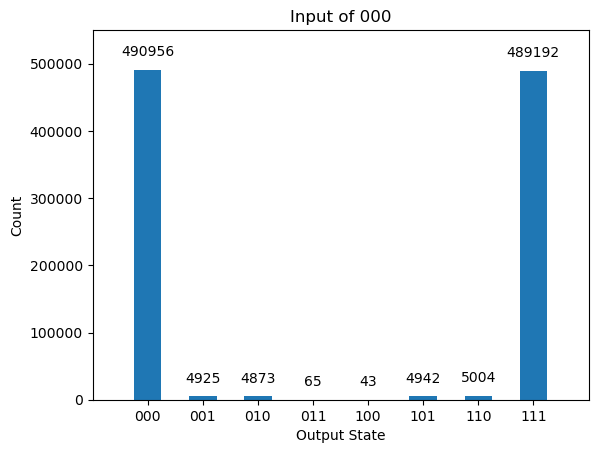

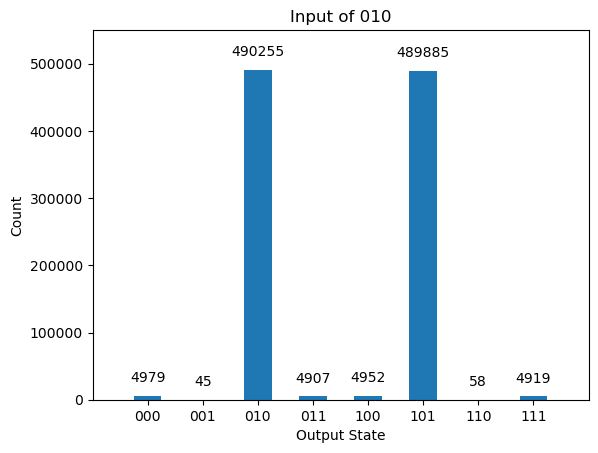

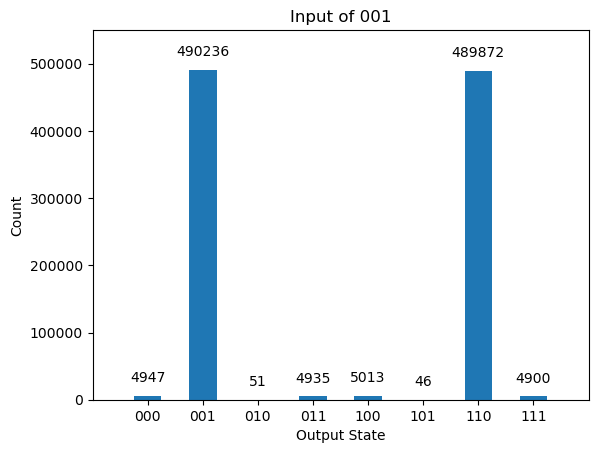

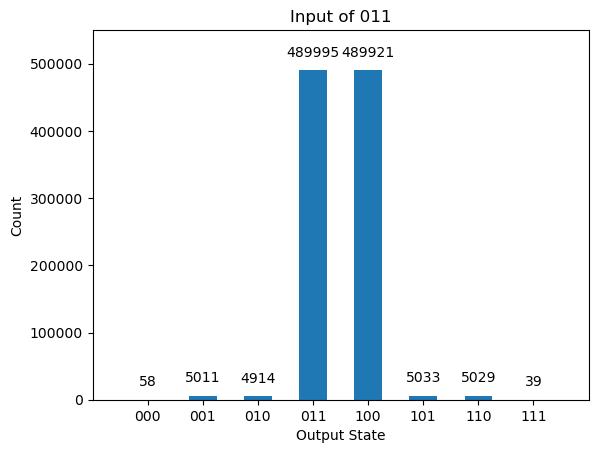

In [37]:
for i in countsDC:
    plt.figure()
    ax = doubleControlledResults.loc[i].plot(kind='bar')
    ax.set_xlabel('Output State')
    ax.set_ylabel('Count')
    ax.bar_label(ax.containers[0], padding = 8)
    ax.set_ylim(top=550000)
    ax.set_xlim(left=-1, right=8)
    ax.set_title('Input of ' + i)
    plt.xticks(rotation=0)
    plt.show()

Measurement Circuit

In [12]:
#function to create basic circuit with measurement circuit

def QCircuitMeasureBell(qc):
    
    qc.h(0)
    qc.cnot(0,1)
    qc.cnot(0,2)
    
    qc.cnot(0,2)
    qc.cnot(0,1)
    qc.h(0)
    
    qc.measure([0,1,2], [0,1,2])
    
    return qc

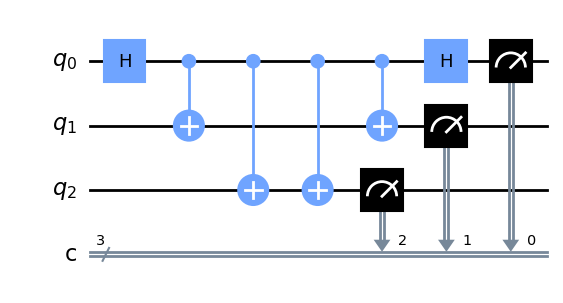

In [13]:
#create such a circuit
qc = QuantumCircuit(3, 3)

circuitMeasured = QCircuitMeasureBell(qc)


circuitMeasured.draw(output='mpl')

In [14]:
#create circuits for each possible input

tests = {'000': None, '010': 1, '001': 2, '011':[1,2]}
circuitsMDC = {}
countsMDC = {}

for i in tests:
    qc = QuantumCircuit(3,3)
    qc.i([1,2])
    qc.reset([0, 1, 2])
    if i != '000':
        qc.x(tests[i])
    circuitsMDC[i] = QCircuitMeasureBell(qc)

    
measuredDCResults = pd.DataFrame(columns=['000', '001', '010', '011', '100', '101', '110', '111'])

backend = AerSimulator(noise_model=noise_bit_flip)

for i in tests: # the device to run on

    result = backend.run(transpile(circuitsMDC[i], backend), shots=1000000).result()
    countsMDC[i]  = result.get_counts(circuitsMDC[i])
    
    measuredDCResults = pd.concat([measuredDCResults, pd.DataFrame(countsMDC[i], index=[i,])])


measuredDCResults.fillna(0, inplace=True)

measuredDCResults

,000,001,010,011,100,101,110,111
000,980397,0,9726,0,9788,0,89,0
010,9830,0,980308,0,100,0,9762,0
001,10064,0,113,0,979932,0,9891,0
011,103,0,9810,0,9748,0,980339,0


In [15]:
#rename the columns because of qiskits silly convention

measuredDCResults = measuredDCResults.rename(columns={'001': '100', '011': '110', '100':'001', '110':'011'})
measuredDCResults = measuredDCResults[['000', '001', '010', '011', '100', '101', '110', '111']]
measuredDCResults

,000,001,010,011,100,101,110,111
000,980397,9788,9726,89,0,0,0,0
010,9830,100,980308,9762,0,0,0,0
001,10064,979932,113,9891,0,0,0,0
011,103,9748,9810,980339,0,0,0,0


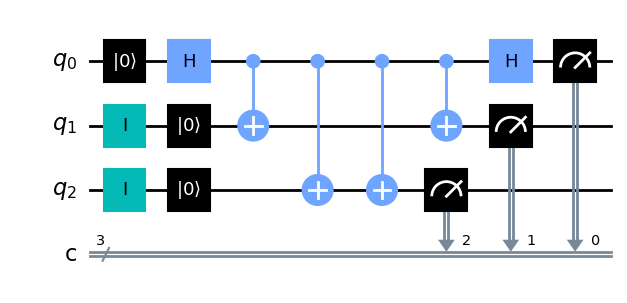

In [44]:
circuitsMDC['000'].draw(output='mpl')

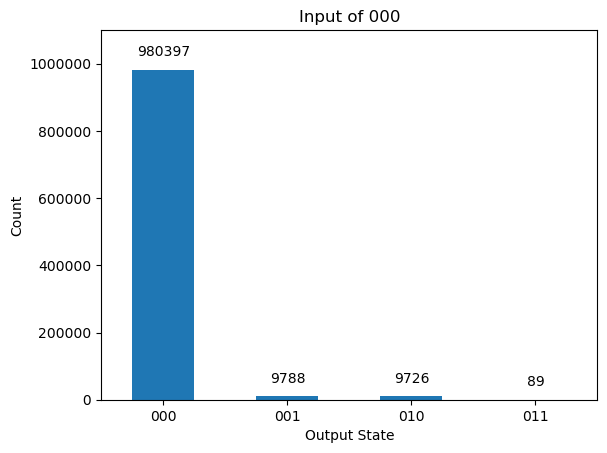

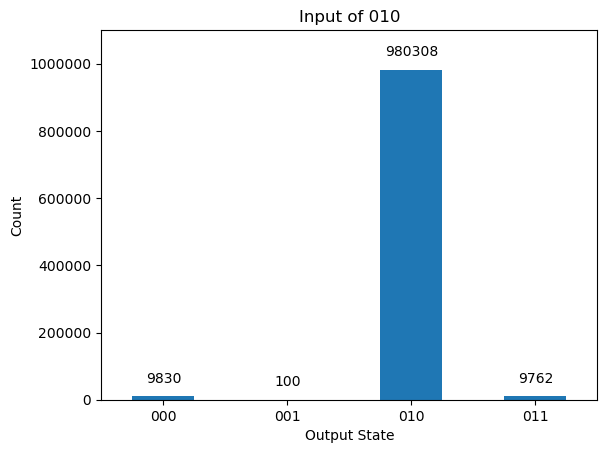

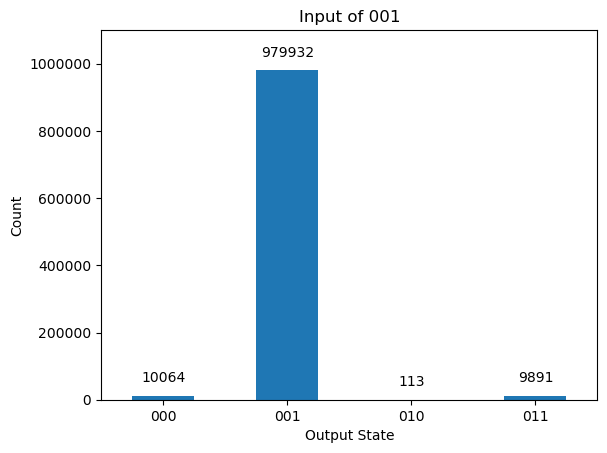

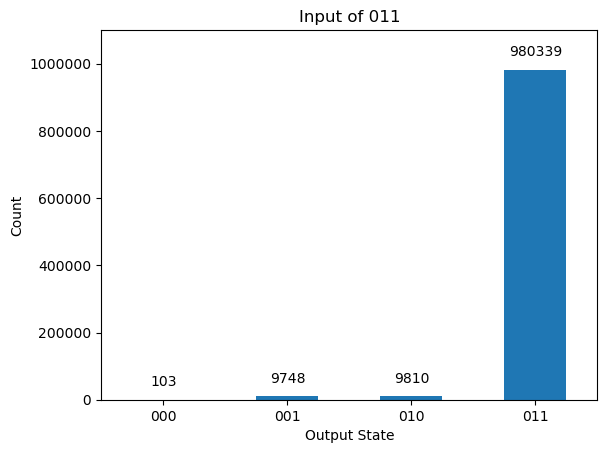

In [40]:
for i in countsMDC:
    plt.figure()
    ax = measuredDCResults[['000','001','010','011']].loc[i].plot(kind='bar')
    ax.set_xlabel('Output State')
    ax.set_ylabel('Count')
    ax.bar_label(ax.containers[0], padding = 8)
    ax.set_ylim(top=1100000)
    #ax.set_xlim(left=-1, right=8)
    ax.set_title('Input of ' + i)
    ax.yaxis.set_major_formatter('{x:6.0f}')
    plt.xticks(rotation=0)
    plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, '000'), Text(1, 0, '001'), Text(2, 0, '010'), Text(3, 0, '011')])

<Figure size 640x480 with 0 Axes>

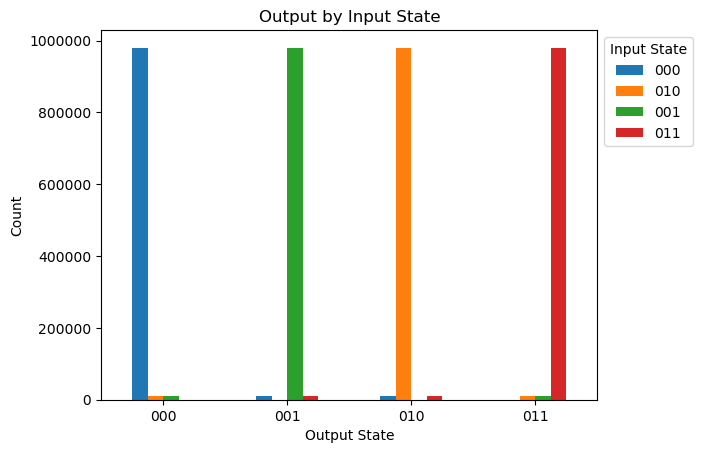

In [56]:
plt.figure()
ax = measuredDCResults[['000','001','010','011']].transpose().plot(kind='bar')
ax.legend(bbox_to_anchor=(1.0, 1), title="Input State")
ax.set_title('Output by Input State')
ax.set_xlabel('Output State')
ax.set_ylabel('Count')
ax.yaxis.set_major_formatter('{x:6.0f}')
plt.xticks(rotation=0)

In [57]:
#running simulations without noise - measured double controlled

countsMDC_noerr = {}

backend = AerSimulator()

measuredDCResults_noerr = pd.DataFrame(columns=['000', '001', '010', '011', '100', '101', '110', '111'])


for i in tests: # the device to run on

    result = backend.run(transpile(circuitsMDC[i], backend), shots=1000000).result()
    countsMDC_noerr[i]  = result.get_counts(circuitsMDC[i])
    
    measuredDCResults_noerr = pd.concat([measuredDCResults_noerr, pd.DataFrame(countsMDC_noerr[i], index=[i,])])
    
measuredDCResults_noerr.fillna(0, inplace=True)

measuredDCResults_noerr = measuredDCResults_noerr.rename(columns={'001': '100', '011': '110', '100':'001', '110':'011'})
measuredDCResults_noerr = measuredDCResults_noerr[['000', '001', '010', '011', '100', '101', '110', '111']]
measuredDCResults_noerr

,000,001,010,011,100,101,110,111
000,1000000,0,0,0,0,0,0,0
010,0,0,1000000,0,0,0,0,0
001,0,1000000,0,0,0,0,0,0
011,0,0,0,1000000,0,0,0,0


In [58]:
#running simulations without noise - double controlled

countsDC_noerr = {}

backend = AerSimulator()

DCResults_noerr = pd.DataFrame(columns=['000', '001', '010', '011', '100', '101', '110', '111'])


for i in tests: # the device to run on

    result = backend.run(transpile(circuitsDC[i], backend), shots=1000000).result()
    countsDC_noerr[i]  = result.get_counts(circuitsDC[i])
    
    DCResults_noerr = pd.concat([DCResults_noerr, pd.DataFrame(countsDC_noerr[i], index=[i,])])
    
DCResults_noerr.fillna(0, inplace=True)

DCResults_noerr = DCResults_noerr.rename(columns={'001': '100', '011': '110', '100':'001', '110':'011'})
DCResults_noerr = DCResults_noerr[['000', '001', '010', '011', '100', '101', '110', '111']]
DCResults_noerr

,000,001,010,011,100,101,110,111
000,500368,0,0,0,0,0,0,499632
010,0,0,500125,0,0,499875,0,0
001,0,500592,0,0,0,0,499408,0
011,0,0,0,500512,499488,0,0,0
